#  YouTube Trending Video Analytics

This project analyzes YouTube trending videos data across different regions using Python. It includes data cleaning, exploratory data analysis, sentiment analysis, and visualization.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
# Optional: For interactive visuals
# import plotly.express as px

In [26]:
# Load dataset
# Replace with your path if different
df = pd.read_csv('GBvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [27]:
df.shape

(38916, 16)

In [28]:
df.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


In [29]:
df.duplicated().sum()

np.int64(171)

In [30]:
# Convert date column and handle missing values
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14258 entries, 3398 to 38580
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                14258 non-null  object             
 1   trending_date           14258 non-null  datetime64[ns]     
 2   title                   14258 non-null  object             
 3   channel_title           14258 non-null  object             
 4   category_id             14258 non-null  int64              
 5   publish_time            14258 non-null  datetime64[ns, UTC]
 6   tags                    14258 non-null  object             
 7   views                   14258 non-null  int64              
 8   likes                   14258 non-null  int64              
 9   dislikes                14258 non-null  int64              
 10  comment_count           14258 non-null  int64              
 11  thumbnail_link          14258 non-null  obj

<ipython-input-30-ba089af0f75f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')


In [31]:
df.describe()

,trending_date,category_id,views,likes,dislikes,comment_count
count,14258,14258.000000,1.425800e+04,1.425800e+04,1.425800e+04,1.425800e+04
mean,2005-04-20 18:05:42.376209920,16.687965,6.224920e+06,1.408044e+05,7.031113e+03,1.297934e+04
min,2001-01-18 00:00:00,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2002-09-18 00:00:00,10.000000,2.901375e+05,7.087000e+03,2.320000e+02,8.070000e+02
50%,2004-03-18 00:00:00,20.000000,1.101338e+06,2.840000e+04,8.950000e+02,2.798000e+03
75%,2006-05-18 00:00:00,24.000000,3.951809e+06,1.221878e+05,3.484000e+03,9.746250e+03
max,2012-12-17 00:00:00,43.000000,4.245389e+08,5.613827e+06,1.545014e+06,1.228655e+06
std,NaN,7.801038,1.943083e+07,3.562089e+05,3.423726e+04,4.154072e+04


In [32]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [33]:
# Most viewed videos
most_viewed = df.sort_values('views', ascending=False).head(10)
most_viewed[['title', 'channel_title', 'views']]

,title,channel_title,views
28412,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,424538912
28212,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,413586699
28008,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,402650804
27811,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,392036878
27615,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,382401497
27424,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,372399338
27241,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,362111555
21162,Ozuna x Romeo Santos - El Farsante Remix,Ozuna,288811992
33441,"Te Bote Remix - Casper, Nio García, Darell, Ni...",Flow La Movie,276937319
23324,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,267012176


In [34]:
grouped = df.groupby('tags')['views'].max().reset_index()
grouped.sort_values('views', ascending=False).head(10)

,tags,views
98,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",424538912
667,"Ozuna|""Reggaeton""|""Odisea""|""Odisea The Album""|...",288811992
867,"Te Bote|""Te Bote Remix""|""Flow La Movie""|""Ozuna...",276937319
100,"Bad|""Bunny""|""Bad Bunny""|""Video Oficial""|""Music...",267012176
180,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",259721696
262,"Drake new music|""Drake Gods Plan""|""Drake God’s...",160187377
1225,"daddy yankee reggaeton|""daddy yankee youtube""|...",149466474
554,"Luis|""Fonsi""|""Demi""|""Lovato""|""Échame""|""La""|""Cu...",143408235
62,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",137183106
668,"Ozuna|""Reggaeton""|""Odisea""|""Odisea The Album""|...",137081637


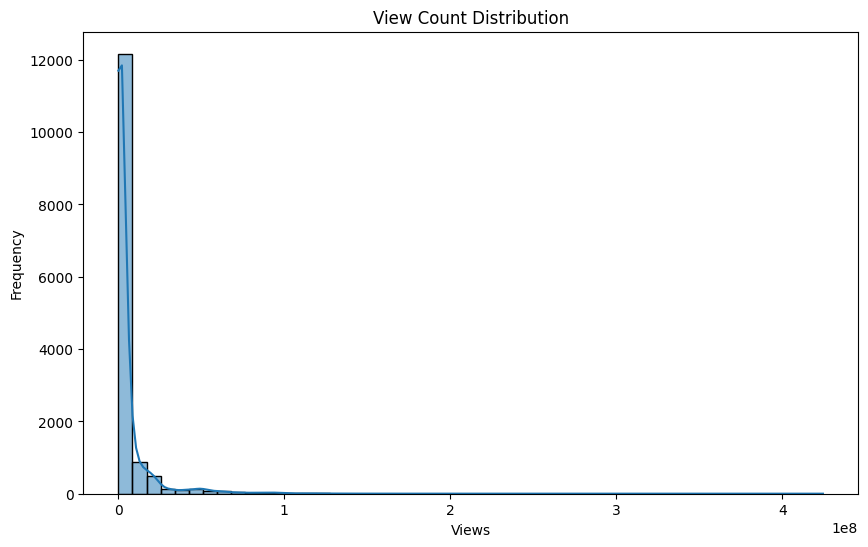

In [35]:
# Plot view distribution
plt.figure(figsize=(10,6))
sns.histplot(df['views'], bins=50, kde=True)
plt.title('View Count Distribution')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Sentiment analysis on video titles
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity
df['title_sentiment'] = df['title'].apply(get_sentiment)
df[['title', 'title_sentiment']].head()

,title,title_sentiment
3398,Marvel Studios' Avengers: Infinity War Officia...,0.000000
3399,The New Snapchat in 60 Seconds,0.136364
3400,Kelly Clarkson Carpool Karaoke,0.000000
3401,Why cities are full of uncomfortable benches,-0.075000
3402,Sam Smith - One Last Song (Official Video),0.000000


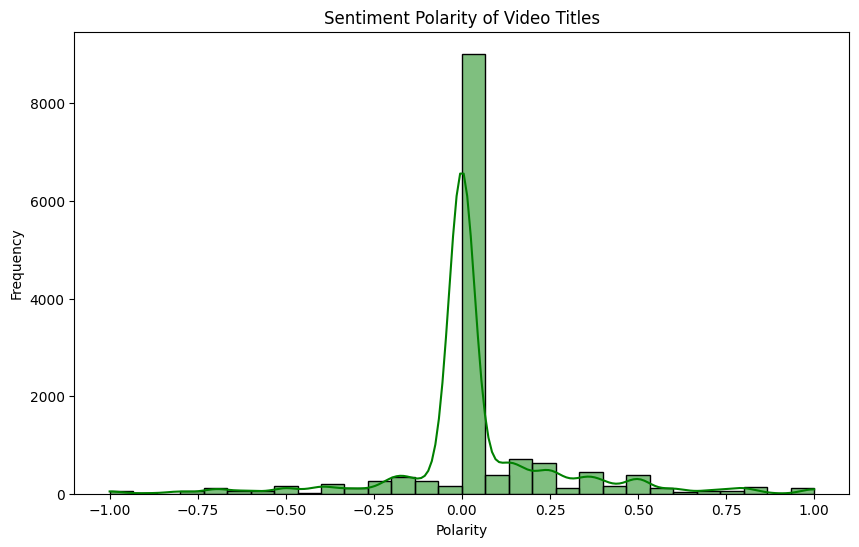

In [37]:
# Plot sentiment distribution
plt.figure(figsize=(10,6))
sns.histplot(df['title_sentiment'], bins=30, kde=True, color='green')
plt.title('Sentiment Polarity of Video Titles')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

In [38]:
def tag_sentiments(tag):
  return TextBlob(str(tag)).sentiment.polarity
df['sentiment_tags']=df['tags'].apply(tag_sentiments)
df[['tags', 'sentiment_tags']].sort_values(by='sentiment_tags', ascending=False).head()

,tags,sentiment_tags
22435,"battlefield 1|""battlefield 2018""|""bf2018""|""bat...",1.0
36620,"Gregory House|""House M.D.""|""Dr House""|""House""|...",1.0
22636,"fleurdeforce|""fleur de force""|""fleurdevlog""|""f...",1.0
22642,"battlefield 1|""battlefield 2018""|""bf2018""|""bat...",1.0
4954,"money|""finance""|""youtube""|""vlogbrothers""|""econ...",1.0


In [39]:
df.to_csv('YouTube_Trending_Analytics_GB',index=False)

In [40]:
# prompt: df['tags'].value_counts().head(20) & df['views'].head(20) want to know the trending views relation

trending = df.groupby('tags')['views'].sum().sort_values(ascending=False).head(20)
trending


,views
tags,
"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Ozuna""|""Romeo Santos""|""El Farsante Remix""|""Drake""|""God’s Plan""|""Luis Fonsi""|""Demi Lovato""|""Échame La Culpa""|""Sobredosis""|""Maluma""|""Corazón""|""Nego do Borel""|""Ed Sheeran""|""Perfect""|""Shape of You""|""Camila Cabello""|""Havana""|""Young Thug""|""Wisin""|""Yandel""|""Todo Comienza en la Disco""|""Piso 21""|""Déjala Que Vuelva""|""Manuel Turizo""|""Despacito""|""Síguelo Bailando""|""Reik""|""Me Niego""|""Bella Wolfine""",3564520647
"Childish Gambino|""Rap""|""This Is America""|""mcDJ Recording/RCA Records""",2970060554
"Bad|""Bunny""|""Bad Bunny""|""Video Oficial""|""Music Video""|""Amor Foda""|""Amorfoda""|""No Quiero Que Nadie Me Hable De Amor""|""Ya Me Canse""|""Que nadie me hable de amor""|""San Valentin""",2596025383
"Te Bote|""Te Bote Remix""|""Flow La Movie""|""Ozuna""|""Nio Garcia""|""Casper""|""Nicky Jam""|""Bad Bunny""|""Darell""",2584859866
[none],2065747422
"Drake new music|""Drake Gods Plan""|""Drake God’s Plan""|""Scary Hours""|""Drake Charity Giveaway""|""Drake in Miami""",1481076443
"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""|""Universal""|""Records""|""Pop""",1305535609
"Ozuna|""Reggaeton""|""Odisea""|""Odisea The Album""|""Romeo Santos""|""El Farsante Remix""",1127727933
"The|""Weeknd""|""Call""|""Out""|""My""|""Name""",1108709962
